<a href="https://colab.research.google.com/github/deniz2104/Anomaly-Detector/blob/main/Proiect_anomalii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting anomalies using weather datas
## The dataset contains 3650 rows including temperatures for each day starting with the date: 1/1/1981 and ending with the date: 12/31/1990
### This project aims to detect anomalies using multiple methods of classification.

#Import necessary libraries


In [ ]:
!pip install pyod
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.ocsvm import OCSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from scipy.spatial.distance import euclidean

#Loading dataset and Preprocessing
## We can see that no data is either null or missing.

In [ ]:
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    if data.isnull().values.any():
      print("There are null values in the dataset.")
    else:
      print("No null values in the dataset.")

    print("\n")
    return data

#Browsing different statistics of the datas to understand the dataset
### For a simple dataset like this i have considered that is relevant to check for null datas,the maximum and minimal temperatures to see what datas could be an anomaly for the distribution of the datas

In [ ]:
def display_basic_statistics(data):
    #Displaying general information about the dataset
    print("General Statistics:")
    print("\n")
    print(data.info())
    print("\n")


    #Displaying the first few rows of the dataset
    print("First Few Rows:")
    print("\n")
    print(data.head)
    print("\n")


    # Check for missing data
    print("Missing Data:")
    print("\n")
    print(data.isnull().sum())
    print("\n")


    # Minimum and maximum for 'Temp' column
    print("Temperature Statistics:")
    print("\n")
    print(f"Min: {data['Temp'].min()}, Max: {data['Temp'].max()}")
    print("\n")


    print("Basic Statistics:")
    print("\n")
    print(data['Temp'].describe())
    print("\n")

# Different types of plots for the data of the weather

In [ ]:
def plot_temperature_trend_and_temperature_distribution(data):

    plt.figure(figsize=(12, 6))
    plt.scatter(data['Date'], data['Temp'], label='Min Temperature', color='blue', linewidth=0.6)
    plt.title('Temperature Over Time', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Temperature(°C)', fontsize=12)
    plt.show()
    print("\n")

    plt.figure(figsize=(12, 6))
    plt.hist(data['Temp'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Temperature Distribution', fontsize=16)
    plt.xlabel('Temperature (°C)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()
    print("\n")


#Detecting anomalies using OCSVM

In [ ]:

def detect_anomalies_ocsvm(data, contamination=0.1, kernel='rbf', gamma='scale', nu=0.5):
    # Prepare the data by scaling the temperature values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data[['Temp']])

    # Initialize and fit the One-Class SVM model
    clf = OCSVM(contamination=contamination, kernel=kernel, gamma=gamma, nu=nu)
    clf.fit(X_scaled)

    # Predict anomalies (1: anomaly, 0: normal)
    data['Anomaly'] = clf.predict(X_scaled)  # 0: Normal, 1: Anomaly
    return data

#Plotting the anomalies

In [ ]:
def plot_anomalies(data,title):
    anomaly = data[data['Anomaly'] == 1]
    normal = data[data['Anomaly'] == 0]

    plt.figure(figsize=(14, 7))
    plt.scatter(normal['Date'], normal['Temp'], label='Normal', color='blue', alpha=0.6)
    plt.scatter(anomaly['Date'], anomaly['Temp'], color='red', label='Anomaly', zorder=3)
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Temperature (°C)', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(alpha=0.5)
    plt.show()
    print("\n")


#Using more parameters to test the OCSVM

In [ ]:
def test_ocsvm_with_params(data, params_list):
        results=[]
        for params in params_list:
          contamination = params.get('contamination', 0.1)
          kernel = params.get('kernel', 'rbf')
          nu = params.get('nu', 0.5)
          gamma = params.get('gamma', 'scale')

          processed_data = detect_anomalies_ocsvm(data.copy(), contamination=contamination, kernel=kernel, nu=nu, gamma=gamma)

          title = f"Anomalies Detected (Kernel={kernel}, Contamination={contamination}, Nu={nu}, Gamma={gamma})"
          plot_anomalies(processed_data, title)

          np.random.seed(42)
          y_true = np.random.choice([0, 1], size=len(data), p=[1-contamination, contamination])
          y_pred = processed_data['Anomaly']

          metrics = evaluate_performance(y_true, y_pred)

          results.append({"config": params, "metrics": metrics})

        return results


# Performance scores and indices

In [ ]:
def evaluate_performance(y_true,y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall=recall_score(y_true, y_pred)
    f1=f1_score(y_true, y_pred)

    return {"Accuracy": accuracy, "Precision": precision, "Recall-score":recall, "F1-Score":f1}

# Main Script

No null values in the dataset.


General Statistics:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB
None


First Few Rows:


<bound method NDFrame.head of            Date  Temp
0    1981-01-01  20.7
1    1981-01-02  17.9
2    1981-01-03  18.8
3    1981-01-04  14.6
4    1981-01-05  15.8
...         ...   ...
3645 1990-12-27  14.0
3646 1990-12-28  13.6
3647 1990-12-29  13.5
3648 1990-12-30  15.7
3649 1990-12-31  13.0

[3650 rows x 2 columns]>


Missing Data:


Date    0
Temp    0
dtype: int64


Temperature Statistics:


Min: 0.0, Max: 26.3


Basic Statistics:


count    3650.000000
mean       11.177753
std         4.071837
min         0.000000
25%         8.300000
50%        11.000000
75%        

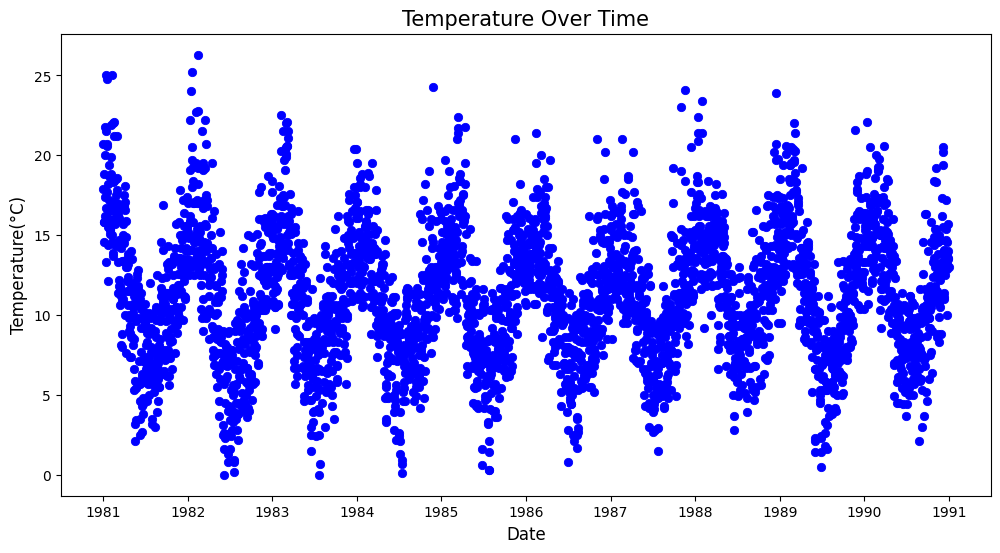

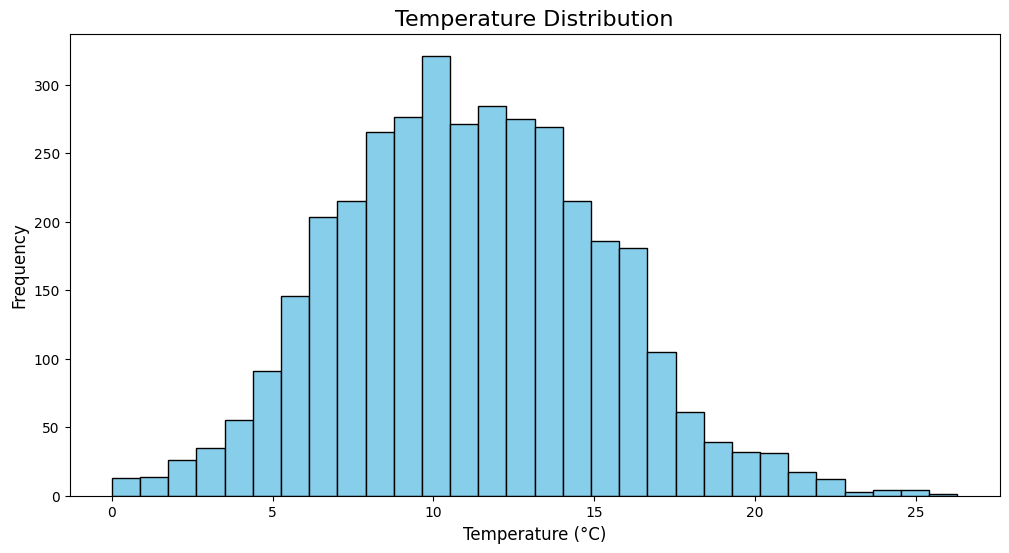

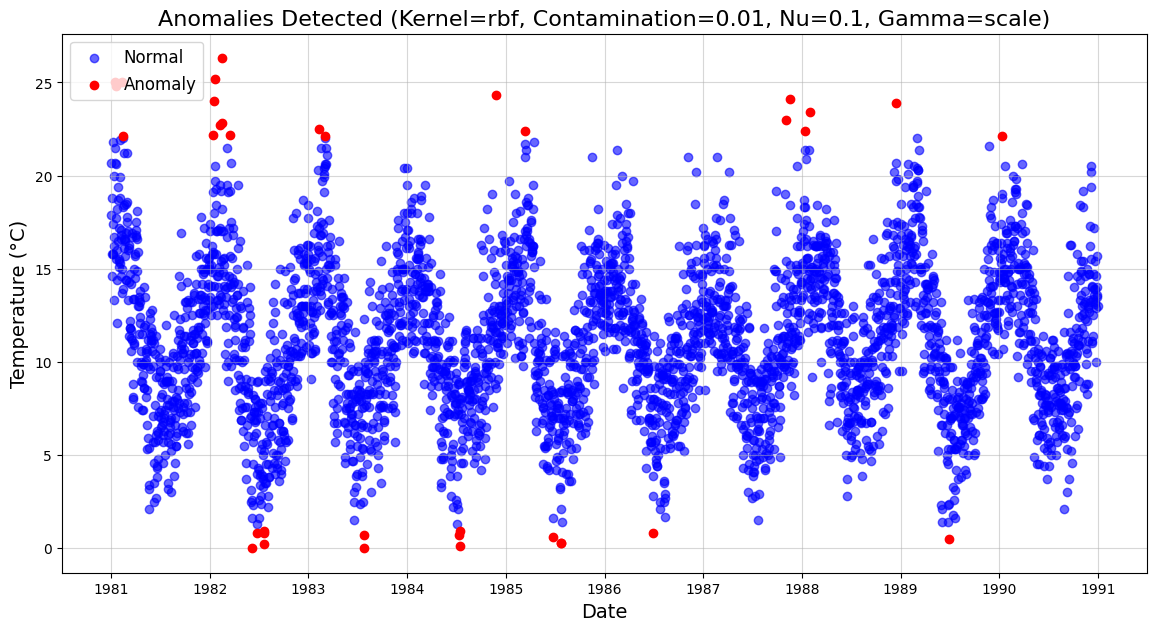

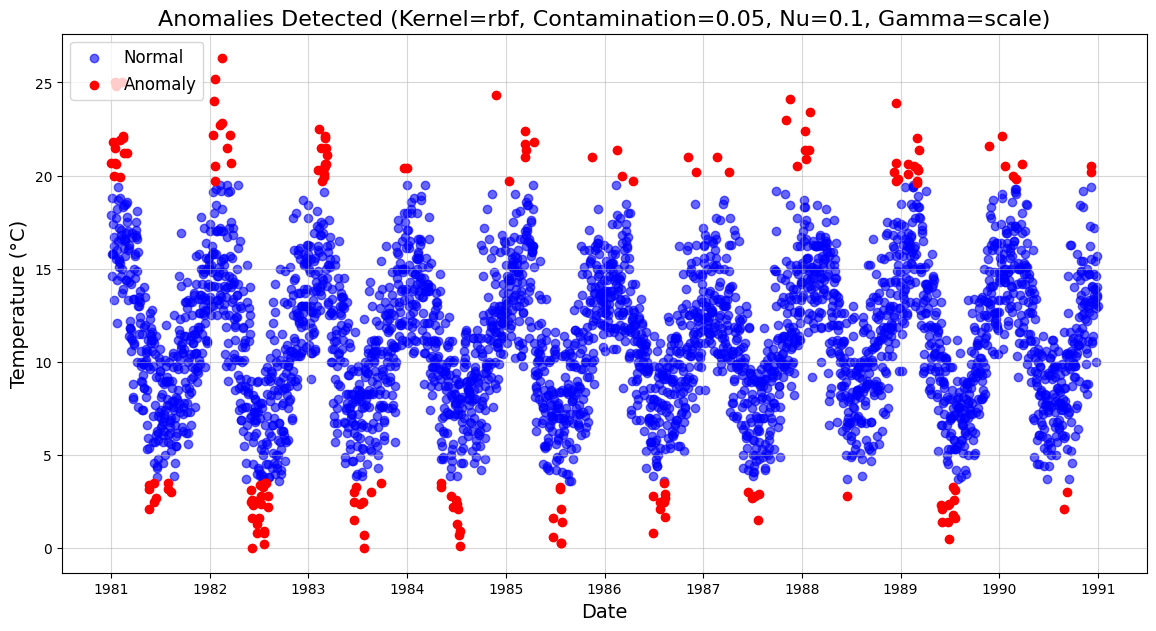

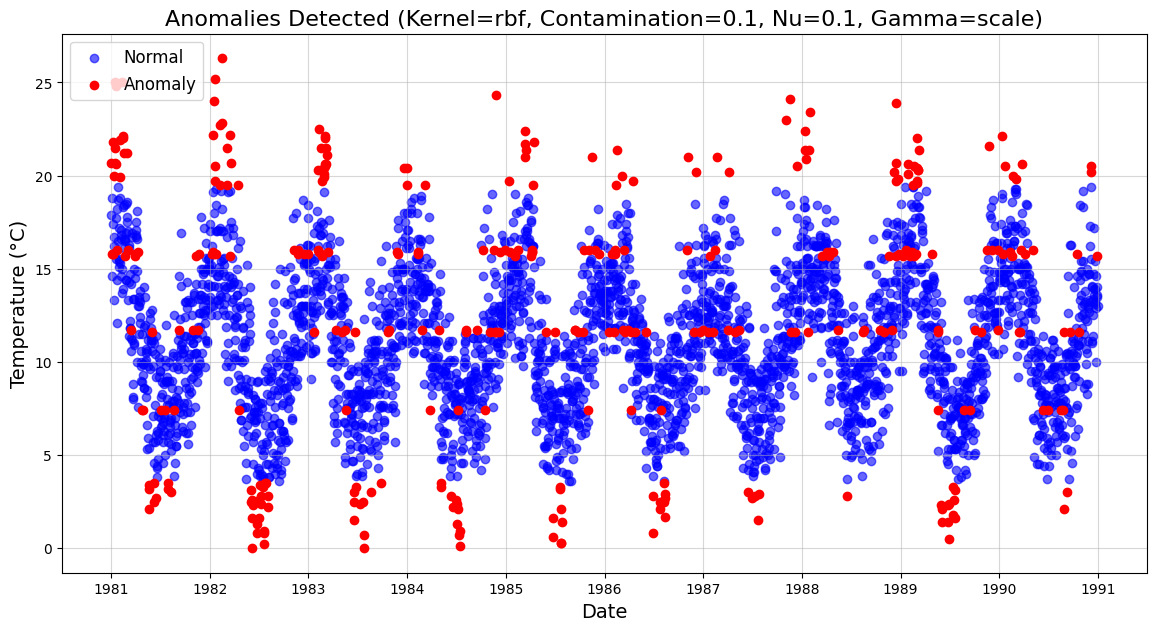

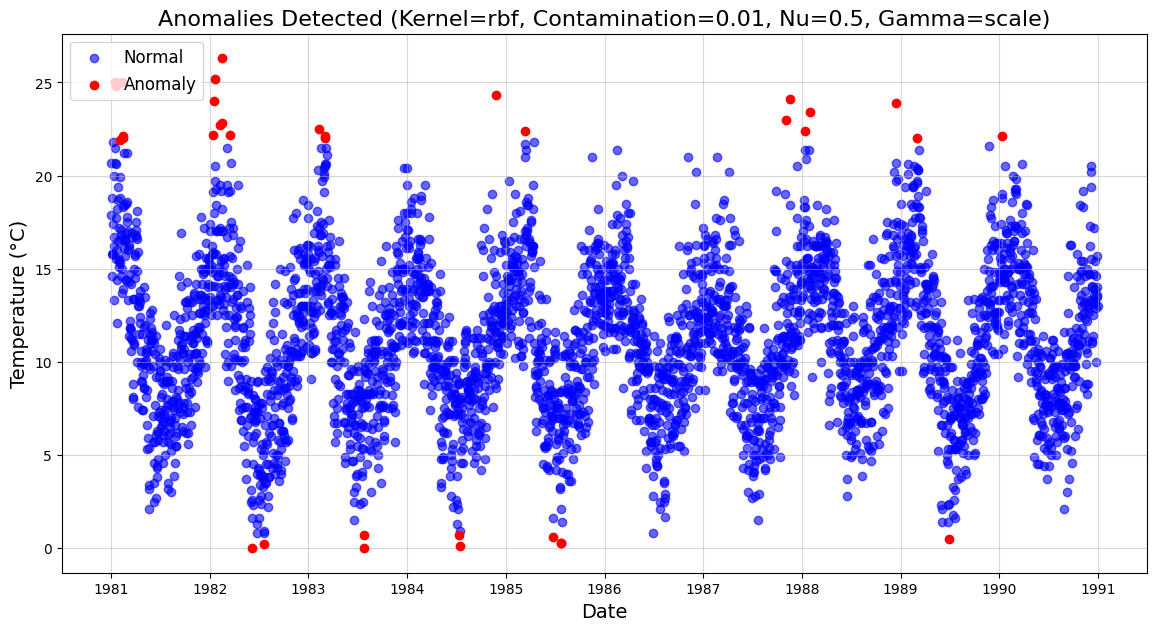

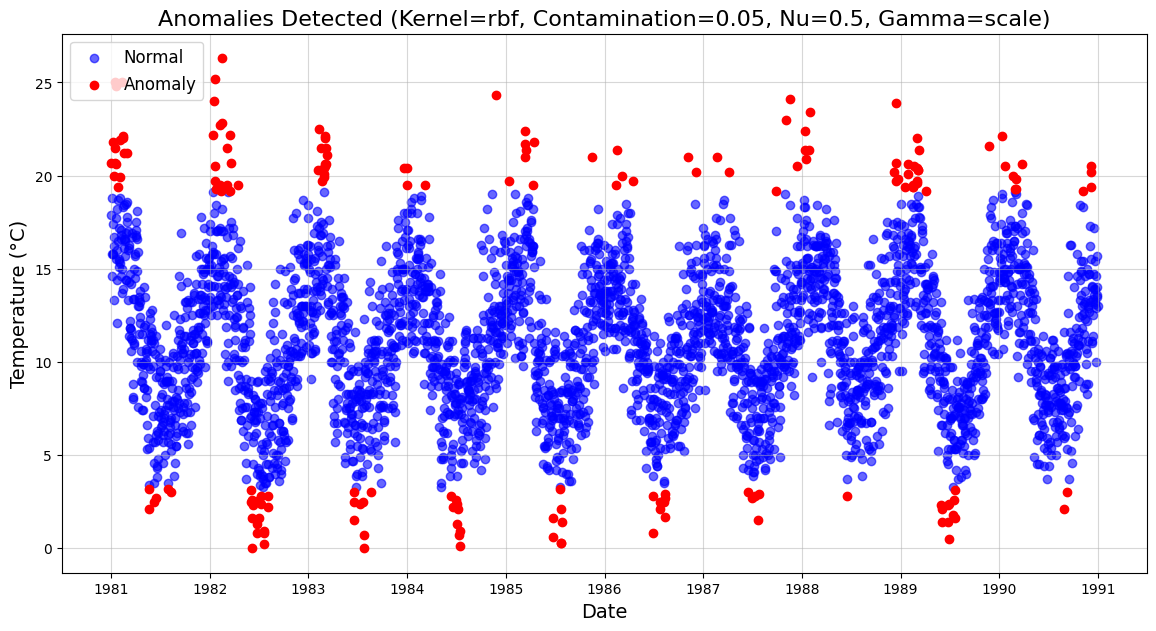

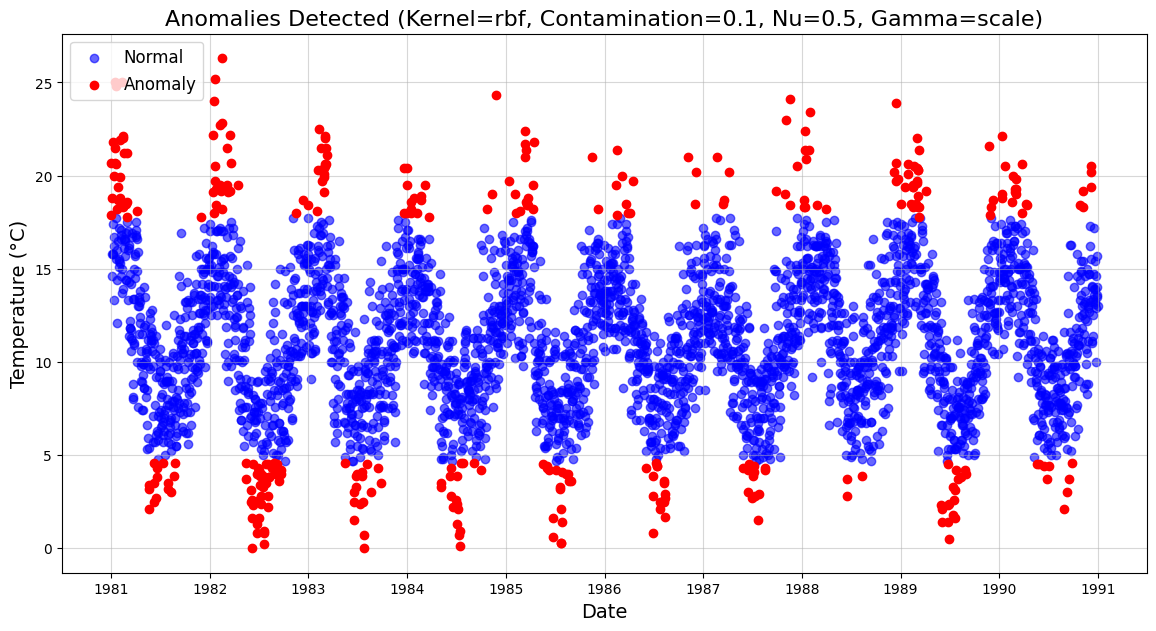

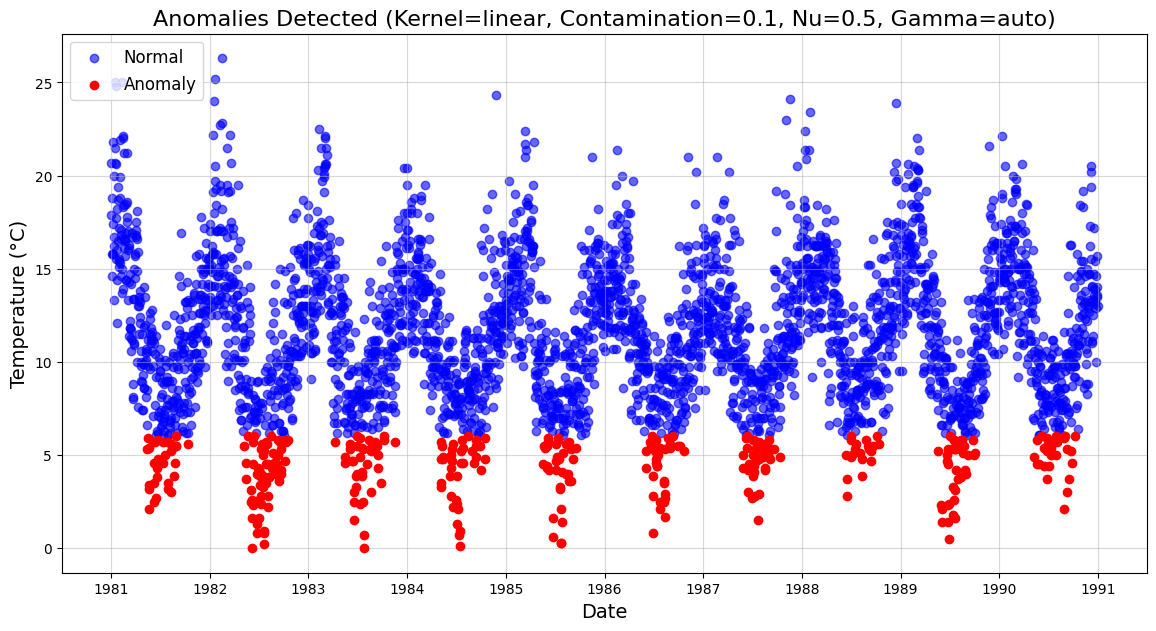

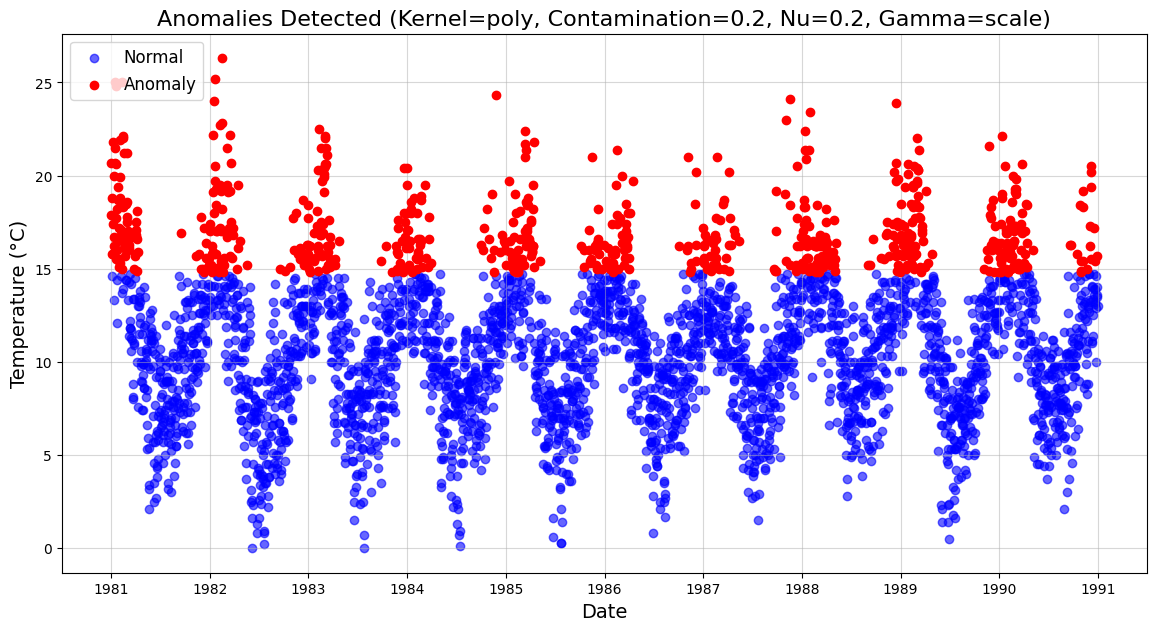




Configuration 1: {'contamination': 0.01, 'kernel': 'rbf', 'nu': 0.1, 'gamma': 'scale'}
Accuracy: 0.9808
Precision: 0.0278
Recall-score: 0.0278
F1-Score: 0.0278

Configuration 2: {'contamination': 0.05, 'kernel': 'rbf', 'nu': 0.1, 'gamma': 'scale'}
Accuracy: 0.9071
Precision: 0.0852
Recall-score: 0.0777
F1-Score: 0.0813

Configuration 3: {'contamination': 0.1, 'kernel': 'rbf', 'nu': 0.1, 'gamma': 'scale'}
Accuracy: 0.8315
Precision: 0.1137
Recall-score: 0.1114
F1-Score: 0.1126

Configuration 4: {'contamination': 0.01, 'kernel': 'rbf', 'nu': 0.5, 'gamma': 'scale'}
Accuracy: 0.9811
Precision: 0.0286
Recall-score: 0.0278
F1-Score: 0.0282

Configuration 5: {'contamination': 0.05, 'kernel': 'rbf', 'nu': 0.5, 'gamma': 'scale'}
Accuracy: 0.9041
Precision: 0.0710
Recall-score: 0.0674
F1-Score: 0.0691

Configuration 6: {'contamination': 0.1, 'kernel': 'rbf', 'nu': 0.5, 'gamma': 'scale'}
Accuracy: 0.8274
Precision: 0.1089
Recall-score: 0.1114
F1-Score: 0.1102

Configuration 7: {'contamination'

In [ ]:
if __name__ == "__main__":
    # Load and preprocess data
    data = load_and_preprocess_data('daily-min-temperatures.csv')

    # Display basic statistics
    display_basic_statistics(data)
    plot_temperature_trend_and_temperature_distribution(data)

    parameter_configs = [
        {'contamination': 0.01, 'kernel': 'rbf', 'nu': 0.1, 'gamma': 'scale'},
        {'contamination': 0.05, 'kernel': 'rbf', 'nu': 0.1, 'gamma': 'scale'},
        {'contamination': 0.1, 'kernel': 'rbf', 'nu': 0.1, 'gamma': 'scale'},
        {'contamination': 0.01, 'kernel': 'rbf', 'nu': 0.5, 'gamma': 'scale'},
        {'contamination': 0.05, 'kernel': 'rbf', 'nu': 0.5, 'gamma': 'scale'},
        {'contamination': 0.1, 'kernel': 'rbf', 'nu': 0.5, 'gamma': 'scale'},
        {'contamination': 0.1, 'kernel': 'linear', 'nu': 0.5, 'gamma': 'auto'},
        {'contamination': 0.2, 'kernel': 'poly', 'nu': 0.2, 'gamma': 'scale'},
    ]

    results=test_ocsvm_with_params(data, parameter_configs)

    for idx, result in enumerate(results):
        print(f"\nConfiguration {idx + 1}: {result['config']}")
        for metric, value in result['metrics'].items():
              print(f"{metric}: {value:.4f}")
